In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [150]:
df = pd.read_csv('electoral.csv')
df.head()

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,NaN,NaN,68,395,123,244,57,409,91,247
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,NaN,NaN,44,349,98,252,41,351,76,259
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,NaN,NaN,58,354,77,187,51,350,62,190
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,NaN,NaN,43,364,89,206,36,372,66,211
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,NaN,NaN,49,327,108,230,46,331,92,234


In [151]:
dfSimple = df.loc[df['JE'].isnull()].copy()
dfSimple.head()

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,NaN,NaN,68,395,123,244,57,409,91,247
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,NaN,NaN,44,349,98,252,41,351,76,259
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,NaN,NaN,58,354,77,187,51,350,62,190
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,NaN,NaN,43,364,89,206,36,372,66,211
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,NaN,NaN,49,327,108,230,46,331,92,234


In [152]:
dfSimple['FE/AE'] = dfSimple['FE']/dfSimple['AE']
dfSimple['jobbik1/FE'] = dfSimple['jobbik1']/dfSimple['FE']
dfSimple['fidesz1/FE'] = dfSimple['fidesz1']/dfSimple['FE']
dfSimple['lmp1/FE'] = dfSimple['lmp1']/dfSimple['FE']
dfSimple['mszp1/FE'] = dfSimple['mszp1']/dfSimple['FE']

## Voter turnout vs. percentage of votes

### Showing data for FIDESZ

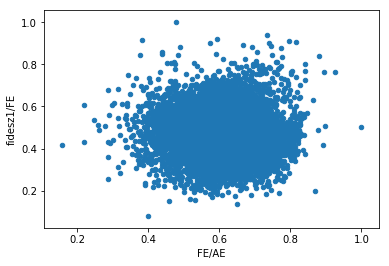

In [153]:
dfSimple.plot.scatter('FE/AE','fidesz1/FE')
plt.show()

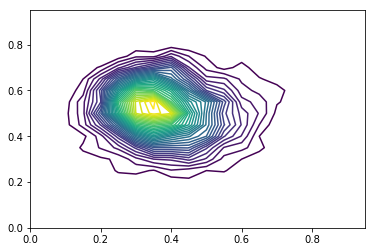

In [154]:
histData = np.histogram2d(dfSimple['FE/AE'], dfSimple['fidesz1/FE'], bins=20, range=None, normed=False, weights=None)

data_2d = histData[0]

deltaX = 1/float(data_2d.shape[1])
deltaY = 1/float(data_2d.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111)
x_data, y_data = np.meshgrid( np.arange(0,1,deltaX),np.arange(0,1,deltaY))

x_data = x_data
y_data = y_data
z_data = data_2d
plt.contour(x_data,y_data,z_data,40)

plt.show()

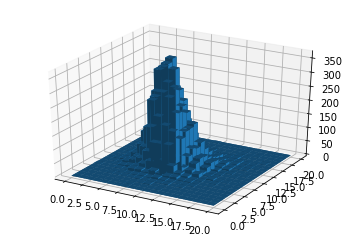

In [155]:
histData = np.histogram2d(dfSimple['FE/AE'], dfSimple['fidesz1/FE'], bins=20, range=None, normed=False, weights=None)

# This following code snippet is from:
# https://stackoverflow.com/questions/14061061/how-can-i-render-3d-histograms-in-python

data_2d = histData[0]
#
# Convert it into an numpy array.
#
data_array = np.array(data_2d)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
#
# Finally, display the plot.
#
plt.show()

This is a textbook-like Gaussian.

### Data for MSZP

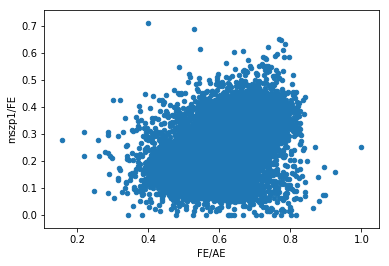

In [156]:
dfSimple.plot.scatter('FE/AE','mszp1/FE')
plt.show()

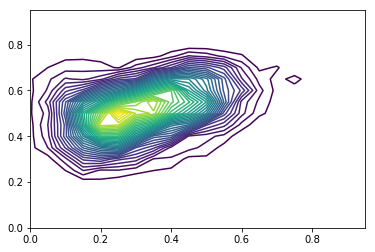

In [157]:
histData = np.histogram2d(dfSimple['FE/AE'], dfSimple['mszp1/FE'], bins=20, range=None, normed=False, weights=None)

data_2d = histData[0]

deltaX = 1/float(data_2d.shape[1])
deltaY = 1/float(data_2d.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111)
x_data, y_data = np.meshgrid( np.arange(0,1,deltaX),np.arange(0,1,deltaY))

x_data = x_data
y_data = y_data
z_data = data_2d
plt.contour(x_data,y_data,z_data,40)

plt.show()

There is something going on here: this is a bit elongated with the peak around 0.25 (percentage of votes to this party); there was probably some incentive provided to vote for them or good campaigning. Nothing too out of the ordinary though.

### Data for LMP

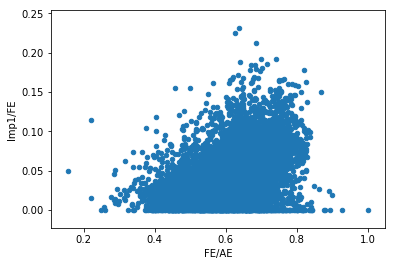

In [158]:
dfSimple.plot.scatter('FE/AE','lmp1/FE')
plt.show()

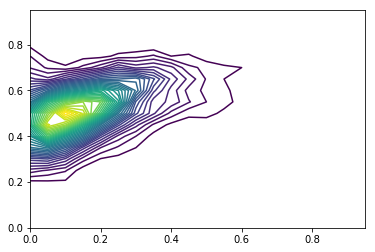

In [159]:
histData = np.histogram2d(dfSimple['FE/AE'], dfSimple['lmp1/FE'], bins=20, range=None, normed=False, weights=None)

data_2d = histData[0]

deltaX = 1/float(data_2d.shape[1])
deltaY = 1/float(data_2d.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111)
x_data, y_data = np.meshgrid( np.arange(0,1,deltaX),np.arange(0,1,deltaY))

x_data = x_data
y_data = y_data
z_data = data_2d
plt.contour(x_data,y_data,z_data,40)

plt.show()

This is similar to the previous plot, only here the elongation is more apparent, as the peak is closer to 0 (~0.1) . Really good campaigning? Would the urban-rural duality cause something ike this? (I'd need to check whether high voter turnout correlates with urban areas, where this party is way more popular than in rural Hungary)

### Data for JOBBIK

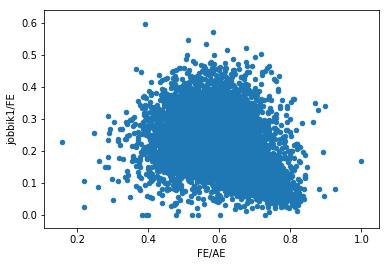

In [160]:
dfSimple.plot.scatter('FE/AE','jobbik1/FE')
plt.show()

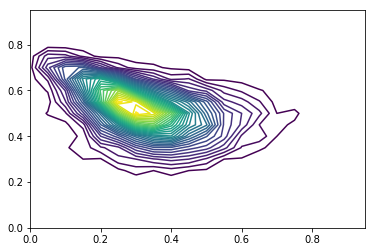

In [161]:
histData = np.histogram2d(dfSimple['FE/AE'], dfSimple['jobbik1/FE'], bins=20, range=None, normed=False, weights=None)

data_2d = histData[0]

deltaX = 1/float(data_2d.shape[1])
deltaY = 1/float(data_2d.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111)
x_data, y_data = np.meshgrid( np.arange(0,1,deltaX),np.arange(0,1,deltaY))

x_data = x_data
y_data = y_data
z_data = data_2d
plt.contour(x_data,y_data,z_data,40)

plt.show()

Slight elongation towards high voter turnout--low number of votes for JOBBIK. This could be the opposite effect of what I've seen with LMP. JOBBIK is less popular in urban areas, thus if voter turnout has location-dependence, that would account for the effect seen here.

## Location vs. Voter turnout

Checking voter turnout in _all_ urban areas would be tricky, as I don't see a clear system in labeling districts (actually, it seems alphabetical), thus locating all or most cities would be really hard. We could, however, focus on the voter turnout in districts of Budapest (and maybe the county of Pest), as this is where 20% of the total population lives, thus a huge portion of urban voters too.

In [162]:
endOfBudapest = 1472
dfBudapest = dfSimple.loc[dfSimple.index[0:endOfBudapest]]
dfBudapest.head()

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,mszp1,jobbik2,fidesz2,lmp2,mszp2,FE/AE,jobbik1/FE,fidesz1/FE,lmp1/FE,mszp1/FE
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,...,244,57,409,91,247,0.796015,0.081049,0.470799,0.146603,0.290822
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,...,252,41,351,76,259,0.749257,0.058201,0.461640,0.129630,0.333333
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,...,187,51,350,62,190,0.647556,0.084180,0.513788,0.111756,0.271408
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,...,206,36,372,66,211,0.727273,0.059722,0.505556,0.123611,0.286111
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,...,230,46,331,92,234,0.754149,0.067400,0.449794,0.148556,0.316369


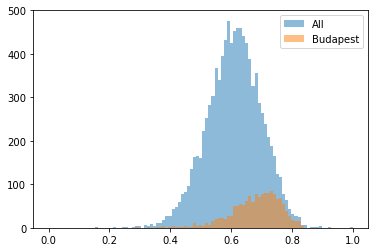

In [163]:
x = dfSimple['FE/AE']
y = dfBudapest['FE/AE']

bins = np.linspace(0, 1, 100)

plt.hist(x, bins, alpha=0.5, label='All')
plt.hist(y, bins, alpha=0.5, label='Budapest')
plt.legend(loc='upper right')
plt.show()

Indeed, voter turnout in Budapest is >0.6 in most of the districts, while the country's average is 0.6